<a href="https://colab.research.google.com/github/ebceran/Global-Sector-Profitability-Analysis-2015-2025-/blob/main/data_sector_profitability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

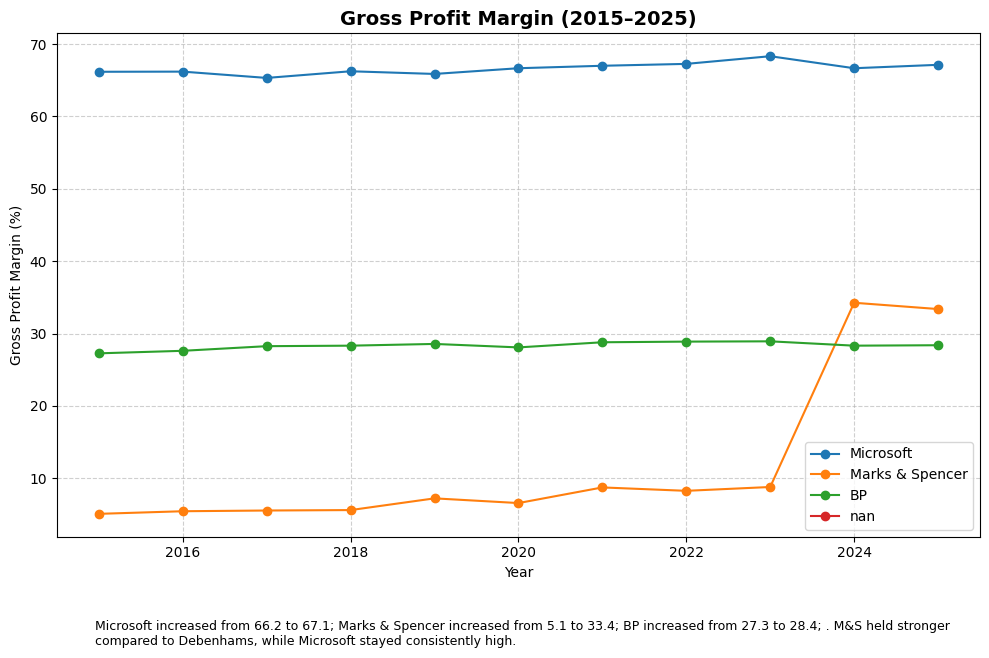

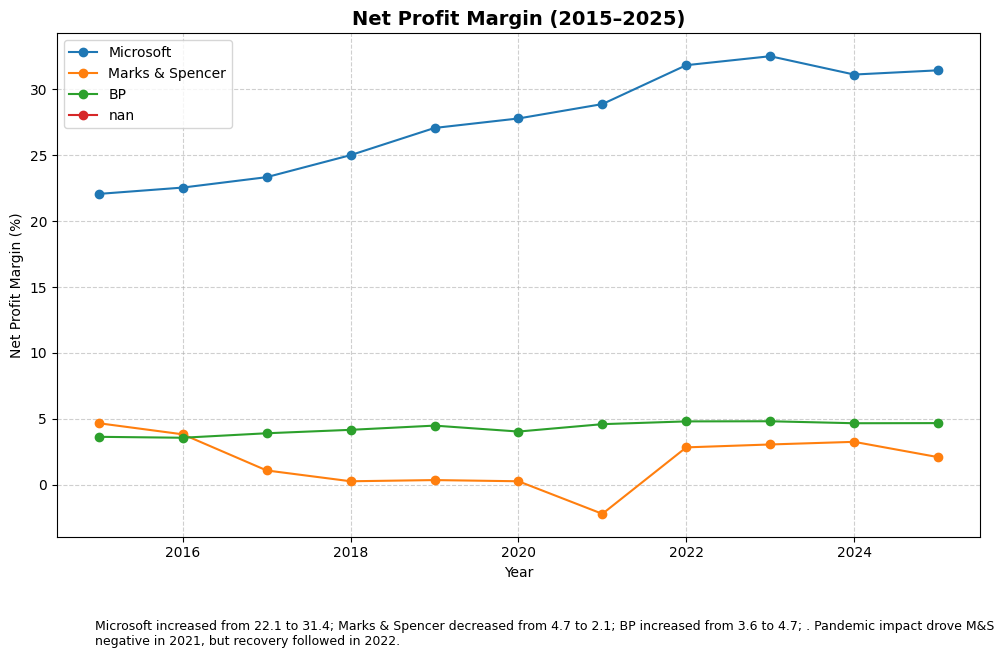

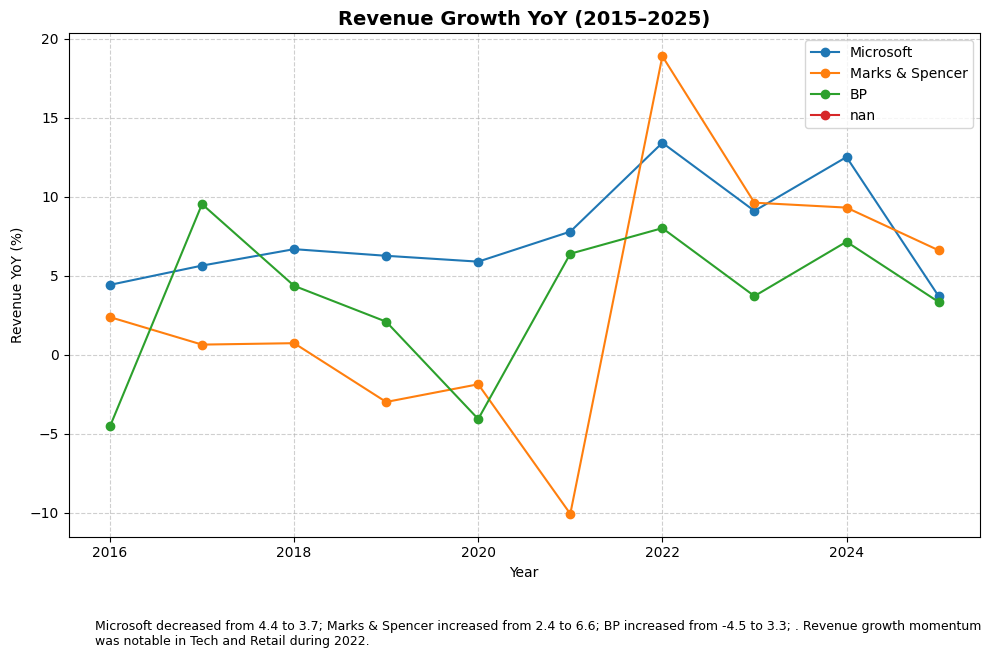

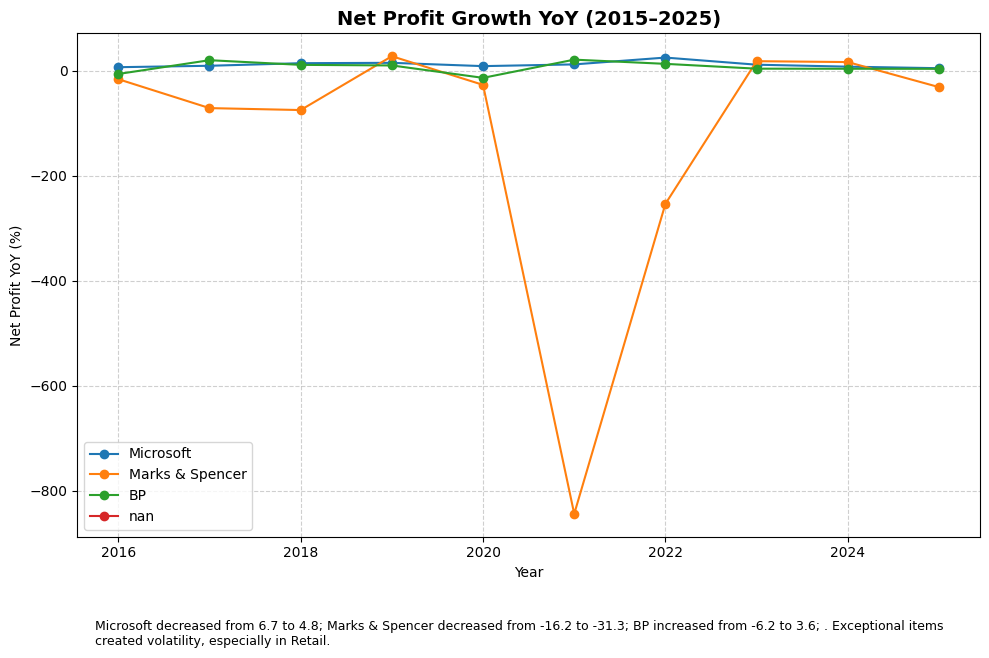

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1) Load data
df = pd.read_csv("/datasector_profitability.csv")

# 2) Clean numeric columns (remove % and convert to float)
for col in ["GPM (%)","NPM (%)","Revenue YoY (%)","Net Profit YoY (%)"]:
    df[col] = df[col].astype(str).str.replace("%","").str.strip()
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 3) Companies list
companies = df["Company"].unique()

# --- FUNCTIONS ---

# Summarize one metric for a company
def metric_summary(df, company, metric):
    subset = df[df["Company"] == company].sort_values("Year")
    values = subset[metric].dropna()
    if len(values) == 0:
        return ""
    start, end = values.iloc[0], values.iloc[-1]
    trend = "increased" if end > start else "decreased" if end < start else "remained stable"
    return f"{company} {trend} from {start:.1f} to {end:.1f}"

# Auto-generate a comment for a metric
def auto_comment(df, metric):
    parts = []
    for company in companies:
        parts.append(metric_summary(df, company, metric))
    return "; ".join(parts)

# Plot with auto-comment
def plot_metric(metric, ylabel, title, filename, context_note=""):
    plt.figure(figsize=(10,6))
    for company in companies:
        subset = df[df["Company"] == company]
        plt.plot(subset["Year"], subset[metric], marker="o", label=company)

    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel("Year")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()

    # Add auto-generated + manual context note
    comment_text = auto_comment(df, metric)
    if context_note:
        comment_text += ". " + context_note
    plt.figtext(0.1, -0.08, comment_text, wrap=True, ha="left", fontsize=9)

    # Save
    os.makedirs("figures", exist_ok=True)
    plt.savefig(f"figures/{filename}", dpi=300, bbox_inches="tight")
    plt.show()

# --- GRAPHS WITH COMMENTS ---

plot_metric("GPM (%)", "Gross Profit Margin (%)",
            "Gross Profit Margin (2015–2025)", "gpm.png",
            context_note="M&S held stronger compared to Debenhams, while Microsoft stayed consistently high.")

plot_metric("NPM (%)", "Net Profit Margin (%)",
            "Net Profit Margin (2015–2025)", "npm.png",
            context_note="Pandemic impact drove M&S negative in 2021, but recovery followed in 2022.")

plot_metric("Revenue YoY (%)", "Revenue YoY (%)",
            "Revenue Growth YoY (2015–2025)", "revenue_yoy.png",
            context_note="Revenue growth momentum was notable in Tech and Retail during 2022.")

plot_metric("Net Profit YoY (%)", "Net Profit YoY (%)",
            "Net Profit Growth YoY (2015–2025)", "netprofit_yoy.png",
            context_note="Exceptional items created volatility, especially in Retail.")



